In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from display_researching import display_ridge_alpha

In [2]:
data = pd.read_csv('datasets/cars.csv')
y = data['dist']
X = np.array(data['speed']).reshape(len(y), 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))

# least squares Linear Regression
lmr = LinearRegression().fit(X_train, y_train)
y_pred = lmr.predict(X_test)
print('linear train {}'.format(lmr.score(X_train, y_train)))
print('linear test {}'.format(lmr.score(X_test, y_test)))
print('linear mse test {}'.format(mean_squared_error(y_test, y_pred)))

linear train 0.6440103060099331
linear test 0.6298251008743228
linear mse test 301.46693323352196


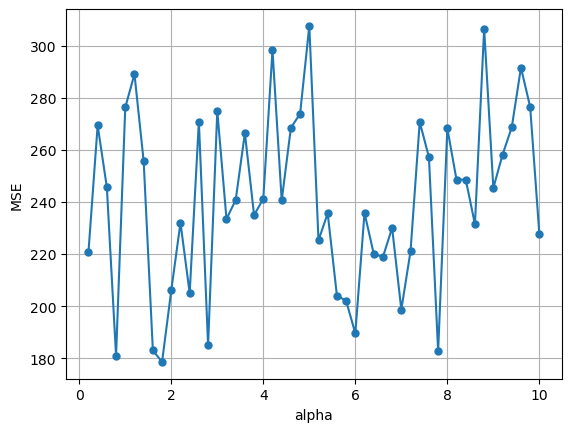

ridge train 0.6440101496191148
ridge test 0.6296842401749989
ridge mse test 301.5816488534589


In [3]:
# ridge Linear Regression
display_ridge_alpha(X, y)
rlr = Ridge(alpha=0.52).fit(X_train, y_train)
y_pred = rlr.predict(X_test)
print('ridge train {}'.format(rlr.score(X_train, y_train)))
print('ridge test {}'.format(rlr.score(X_test, y_test)))
print('ridge mse test {}'.format(mean_squared_error(y_test, y_pred)))

In [4]:
print('v=40 predict {}'.format(rlr.predict([[40]])))

v=40 predict [130.67236735]


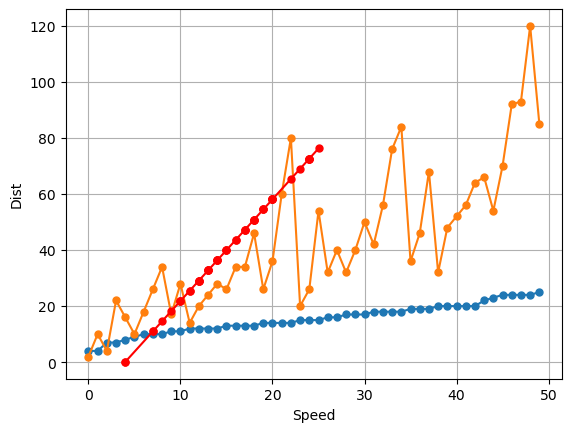

In [5]:
plt.plot(data.loc[:, ['speed', 'dist']], label='test', marker='.', markersize=10)
plt.plot(pd.Series(rlr.predict(X), index=X.reshape(1, len(y))[0]), label='test', markersize=10, marker='.', c='red')
plt.xlabel('Speed')
plt.ylabel('Dist')
plt.grid()
plt.show()